## Phase 1 Project Submission :Microsoft Movie Studio

Please fill out:
* Student name: John Karanja
* Student pace: full time
* Scheduled project review date/time: 16/4/2023
* Instructor name: 
* Blog post URL:


#Introduction 


# 1.0  Project Overview 


Microsoft is looking to create a new movie studio, but they don't have any experience in the movie industry. The goal of this project is to explore movies datasets  and generate insights that can help Microsoft decide what types of films to create.

To achieve this goal, I will use exploratory data analysis on movie datasets from IMDB (im.db.zip) and Box office movie (bom.movie_gross.csv.gz). I will explore various factors that contribute to a movie's success, such as title,studio	,domestic_gross,	foreign_gross	year.

My analysis will be guided by the following data analytic question: What are the key factors that contribute to a movie's box office success, and how can Microsoft leverage these insights to make data-driven decisions for their new movie studio?

To measure the success of our analysis, we will focus on metrics such as studio,	domestic_gross & foreign_gross	year

The final deliverable of this project will be a set of actionable insights that Microsoft can use to inform their decision-making. These insights will include recommendations for which title,studio	domestic_gross,	foreign_gross	year to prioritize for their movie projects.

Overall, this project will provide valuable insights into the current movie industry  and help Microsoft make informed decisions for their new movie studio.

1.2 Specify the Data analytic question 

What are the key factors that contribute to a movie's box office success?




## 2.1 Loading and reading Our Datasets

In [1]:
#importing  necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading and reading the datasets
bom_movies= pd.read_csv('bom.movie_gross.csv.gz', compression='gzip')

In [3]:
#  the first few rows of Box office movies
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#2.2 Checking the data 



In [4]:
# Determining the no. of records in our result dataset
print("bom_movies", bom_movies.shape)


bom_movies (3387, 5)


**observation**: box office movies has 3383 records and 5 variables.

In [5]:
# Previewing the top 5 of bom_movies dataset
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
# Previewing the bottom of our bom_movies dataset
bom_movies.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [7]:
# Checking the columns datatype
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Observation :The dataset has object, float and Integer datatypes. I have also noted that Domestic_gross has missing values and foreign_gross also has alot of missing values .the data type in foreign_gross is object instead of being a float as it represent total amount in foreign bom sales.  

# 2.3 Data Cleaning 

In [8]:
# Check for missing values
print(bom_movies.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Observation:foreign_gross has the most missing values i.e 1350 out of 3387 

In [9]:
# Check for duplicates
print(bom_movies.duplicated().sum())

0


Remark:There are no duplicates 

In [10]:
# droping column with most missing values 
bom_movies.drop(["foreign_gross"], axis=1, inplace=True)
bom_movies.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


# 3.0 Exploratory Data Analysis

In [11]:
# to get descriptive statistics from the data 
bom_movies[['title', 'studio', 'domestic_gross', 'year']].describe()


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [12]:
# to get descriptive statistics from the bom movies after replacing missing values with average 
bom_movies[['title', 'studio', 'domestic_gross', 'year']].describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


#3.1 grouping the data by studio and plotting 

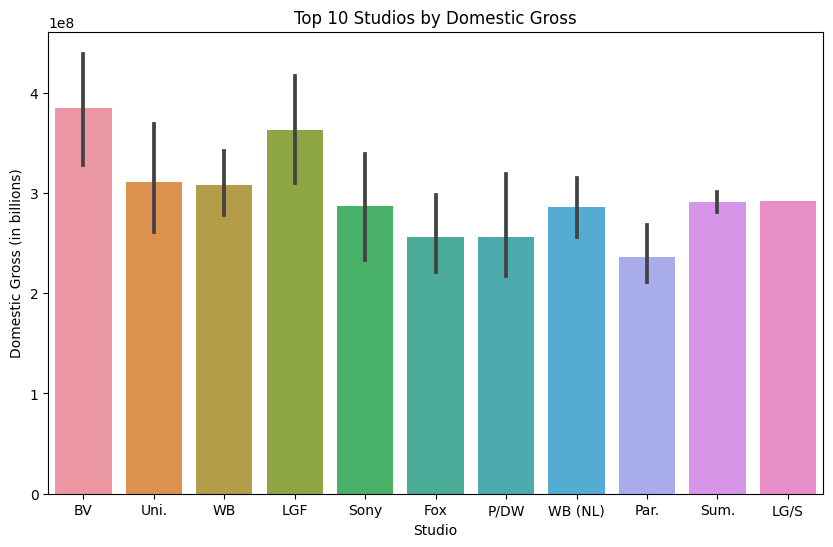

In [13]:
## sort by domestic gross
studio_gross = bom_movies.sort_values('domestic_gross', ascending=False)

# top 10 studios by domestic gross
top10_studios = studio_gross.head(100)

# plot the top 10 studios by domestic gross
plt.figure(figsize=(10,6))
sns.barplot(x='studio', y='domestic_gross', data=top10_studios)
plt.title('Top 10 Studios by Domestic Gross')
plt.xlabel('Studio')
plt.ylabel('Domestic Gross (in billions)')
plt.show()

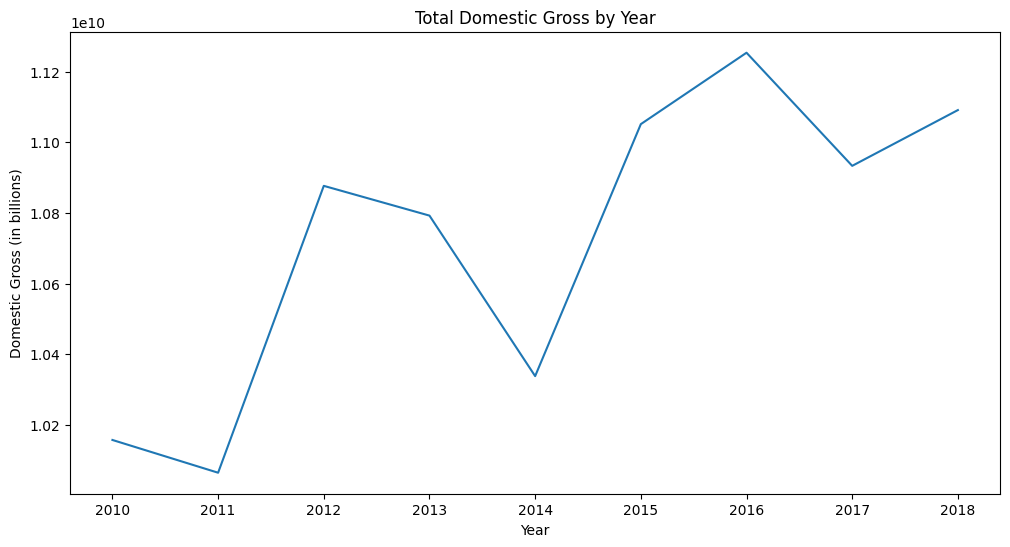

In [14]:

# group by year and calculate the total domestic gross
year_gross = bom_movies.groupby('year')['domestic_gross'].sum().reset_index()

# plot the total domestic gross by year
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='domestic_gross', data=year_gross)
plt.title('Total Domestic Gross by Year')
plt.xlabel('Year')
plt.ylabel('Domestic Gross (in billions)')
plt.show()

# group by year and calculate the average domestic gross
year_avg = bom_movies.groupby('year')['domestic_gross'].mean().reset_index()

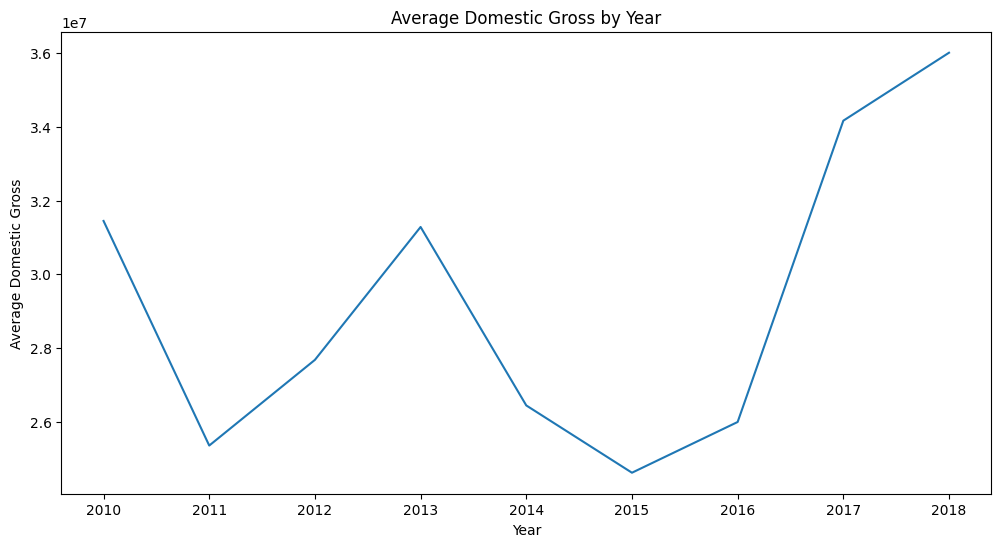

In [15]:
# group by year and calculate the average domestic gross
year_avg = bom_movies.groupby('year')['domestic_gross'].mean().reset_index()

# plot the average domestic gross by year
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='domestic_gross', data=year_avg)
plt.title('Average Domestic Gross by Year')
plt.xlabel('Year')
plt.ylabel('Average Domestic Gross')
plt.show()

Remark:this visualization helps determine trend over time 

In [16]:
#year_avg statistics
year_avg.describe()

,year,domestic_gross
count,9.000000,9.000000e+00
mean,2014.000000,2.921928e+07
std,2.738613,4.131086e+06
min,2010.000000,2.461338e+07
25%,2012.000000,2.598996e+07
50%,2014.000000,2.767584e+07
75%,2016.000000,3.144559e+07
max,2018.000000,3.601042e+07


count    3387.000000
mean     2013.958075
std         2.478141
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64


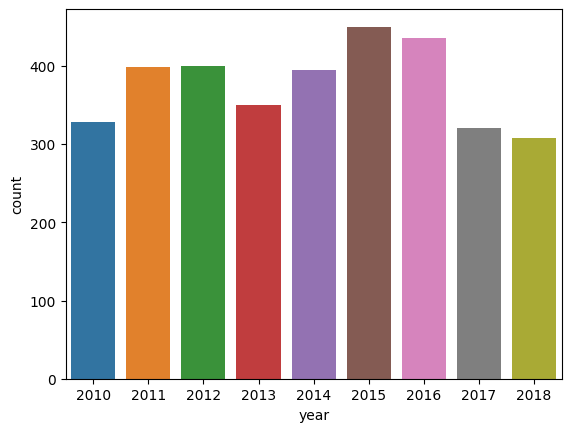

In [17]:
# Univariate analysis for 'year'
print(bom_movies['year'].describe())
sns.countplot(x='year', data=bom_movies)
plt.show()

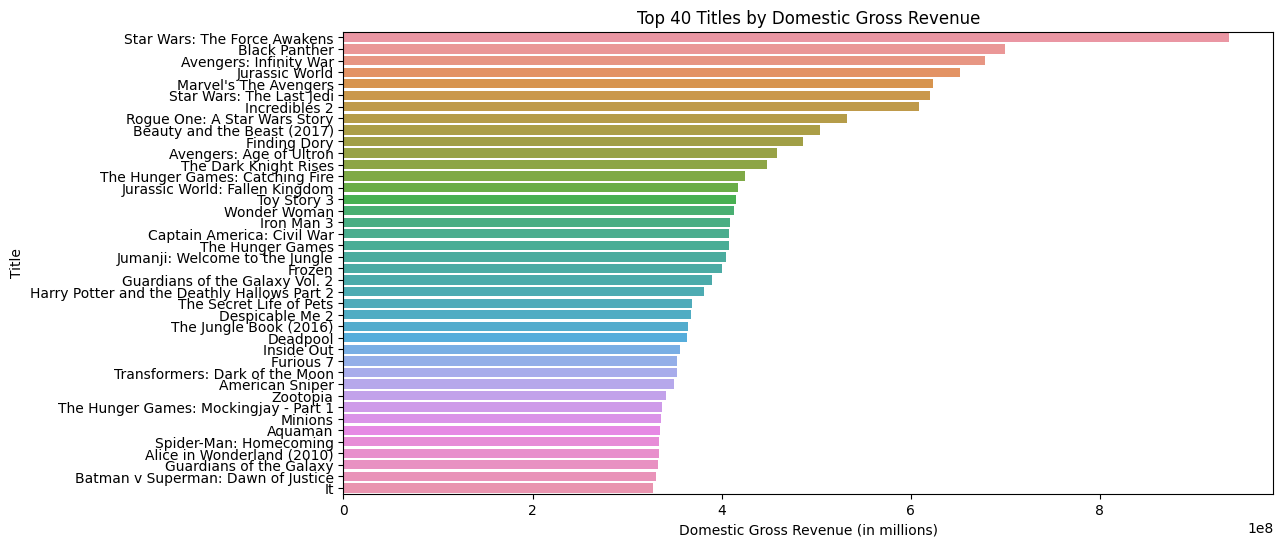

In [18]:
# Creating a new dataframe with top 40 titles by domestic gross revenue
top_titles = bom_movies[['title', 'domestic_gross']].sort_values('domestic_gross', ascending=False).head(40)

# ploting  a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='domestic_gross', y='title', data=top_titles)
plt.title('Top 40 Titles by Domestic Gross Revenue')
plt.xlabel('Domestic Gross Revenue (in millions)')
plt.ylabel('Title')
plt.show()

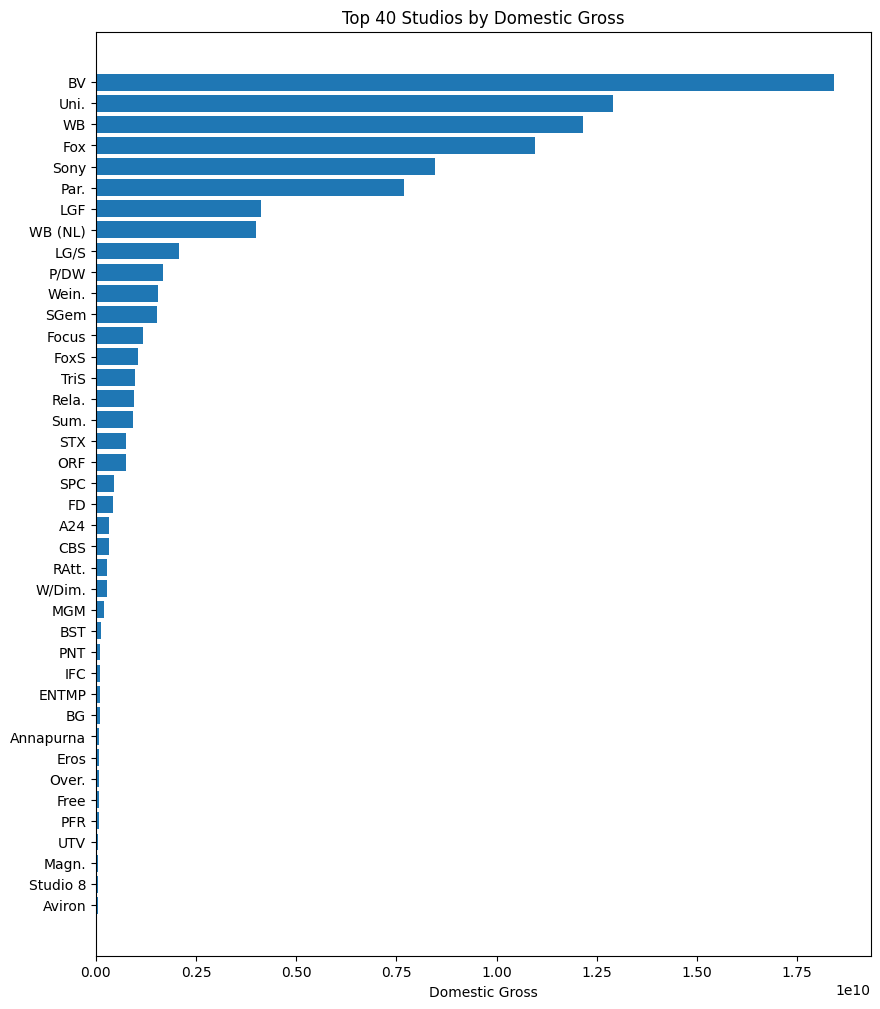

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# group the data by studio and sum the domestic gross
studio_gross = bom_movies.groupby('studio')['domestic_gross'].sum()

# sort the values in descending order and take the top 40
top_studios = studio_gross.sort_values(ascending=False)[:40]

# create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10,12))
ax.barh(top_studios.index, top_studios.values, align='center')
ax.invert_yaxis()  # invert y-axis to show the studios in descending order
ax.set_xlabel('Domestic Gross')
ax.set_title('Top 40 Studios by Domestic Gross')
plt.show()

## **4.0 Data interpretation**

4.1 The top studios  domestic gross revenue 

In [20]:

#  calling  the top 10 movies by domestic gross revenue
top10_studios.head(10)

,title,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,2015
3080,Black Panther,BV,700100000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,2018
1873,Jurassic World,Uni.,652300000.0,2015
727,Marvel's The Avengers,BV,623400000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,2017
3082,Incredibles 2,BV,608600000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,2017
2324,Finding Dory,BV,486300000.0,2016


4.2 Top 10  studios 

They include studio
BV ,Uni.,WB ,Fox Sony,Par. LGF  ,WB (NL),LG/S, P/DW

In [21]:
top_studios.head(10)

studio
BV         1.841903e+10
Uni.       1.290239e+10
WB         1.216805e+10
Fox        1.094950e+10
Sony       8.459683e+09
Par.       7.685871e+09
LGF        4.118963e+09
WB (NL)    3.995700e+09
LG/S       2.078200e+09
P/DW       1.682900e+09
Name: domestic_gross, dtype: float64

4.3 Total domestic gross vs year 

There seems to be an overall increase in the domestic gross revenue year over year 

# **5.0 Recommendations**

1.There is an upward trend  between the year of release and domestic gross revenue. Therefore, Microsoft's new movie studio should focus on producing movies given that there is an opportunity due to the upward trajectory .

2.The mean domestic gross revenue for movies released between 2010 and 2018 is approximately $29 million. Therefore, Microsoft's new movie studio should set of around the same if they want to compete with the top and this will also help in setting a budget as it is the industry mean.

In [22]:
year_avg.describe()

,year,domestic_gross
count,9.000000,9.000000e+00
mean,2014.000000,2.921928e+07
std,2.738613,4.131086e+06
min,2010.000000,2.461338e+07
25%,2012.000000,2.598996e+07
50%,2014.000000,2.767584e+07
75%,2016.000000,3.144559e+07
max,2018.000000,3.601042e+07


3.0 Microsoft can partner or shadow the best perfoming studios in terms of  domestic_gross to give themselves a chance of sucess in the industry They include studio BV ,Uni.,WB ,Fox Sony,Par. LGF ,WB (NL),LG/S, P/DW.

5.1 Limitations
- The dataset has a few variables which limits the areas/variables  in which we can extact insights from .e.g if there was a varable  for genre it would help pinpoint which genres Microsot can focus on to ensure sucess 


# **(movie budgets dataset):Microsoft Movie Studio**

# **1.0 Introduction**
# Project Overview 

Microsoft is looking to create a new movie studio, but they don't have any experience in the movie industry. The goal of this project is to explore movies datasets and generate insights that can help Microsoft decide what types of films to create.

To achieve this goal, I will use exploratory data analysis on movie datasets from ***tn.movie_budgets.csv.gz***. I will explore various factors that contribute to a movie's success, such as movie	production_budget,	domestic_gross,	worldwide_gross and release date 

My analysis will be guided by the following data analytic question: What are the key factors that contribute to a movie's box office success, and how can Microsoft leverage these insights to make data-driven decisions for their new movie studio?

To measure the success of our analysis, we will focus on metrics such as movie	production_budget,	domestic_gross,	worldwide_gross and release date 

The final deliverable of this project will be a set of actionable insights that Microsoft can use to inform their decision-making. These insights will include recommendations for which movie	production_budget,	domestic_gross,	worldwide_gross and release date will be most suited 

Overall, this project will provide valuable insights into the current movie industry and help Microsoft make informed decisions for their new movie studio.

In [23]:
import pandas as pd

# naming the compressed CSV file

file_path="tn.movie_budgets.csv.gz"
# Use pandas to read the compressed CSV file
movie_budgets = pd.read_csv(file_path, compression='gzip',index_col="id")

# the first 5 rows of the dataframe
movie_budgets .head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
# the last 5 rows of the dataframe
movie_budgets .tail()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


# **2.2 Checking the data**

In [25]:
# Determining the no. of records in our result dataset
print("movie_budgets", movie_budgets.shape)

movie_budgets (5782, 5)


Remarks: the dataset has all datatypes as objects.however production budget,domestic gross and worldwide gross should be float as they represent currency amounts.

# **2.3 Data Cleaning**

In [26]:
# Checking for missing values
print(movie_budgets.isnull().sum())

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


Remarks:no missing values in this dataset

In [27]:
# Check for duplicates
print(movie_budgets.duplicated().sum())

0


Remarks:There are no duplicates

# **3.0 Exploratory Data Analysis**

In [28]:
#Printing the first 20 rows to get a feel of the data and  know what to perform EDA on
movie_budgets .head(20)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [29]:
# to get descriptive statistics from the data 
movie_budgets[['release_date', 'movie', 'production_budget', 'domestic_gross',"worldwide_gross"]].describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


Remarks: from the data release_date column has 2418 unique values, indicating that there are movies with the same release date,The movie column has 5698 unique values, indicating that there are multiple movies with the same name and The production_budget, domestic_gross, and worldwide_gross columns have different numbers of unique values, suggesting that i have to change the dollar sign inorder to get correct data figures.

In [30]:
# converting the currency columns (production_budget, domestic_gross, and worldwide_gross) to numerical data type

for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    movie_budgets[col] = movie_budgets[col].str.replace('$', '').str.replace(',', '').astype(float)
# printing first 10 rows to preview the cleaned data
movie_budgets.head(10)  

<ipython-input-30-80e41e8947d0>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets[col] = movie_budgets[col].str.replace('$', '').str.replace(',', '').astype(float)


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08


In [31]:
# to get descriptive statistics from the cleaned data
movie_budgets[['release_date', 'movie', 'production_budget', 'domestic_gross',"worldwide_gross"]].describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


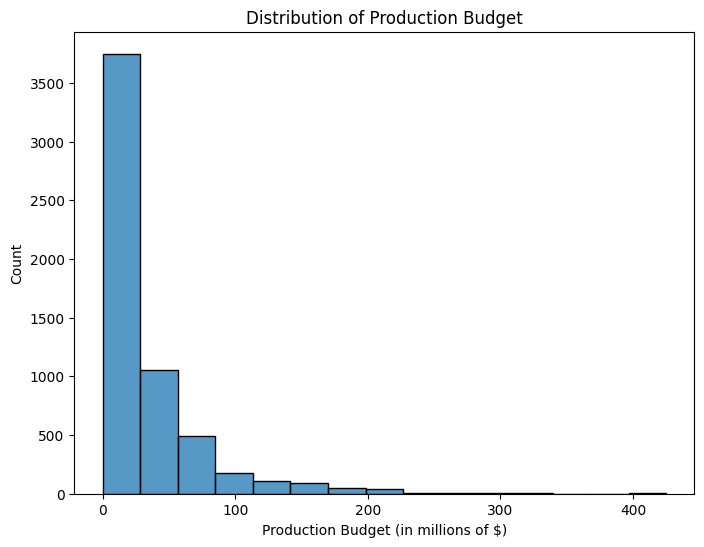

In [32]:
# Distribution of production_budget
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(movie_budgets.production_budget/1000000, kde=False, bins=15)
plt.xlabel('Production Budget (in millions of $)')
plt.ylabel('Count')
plt.title('Distribution of Production Budget')
plt.show()

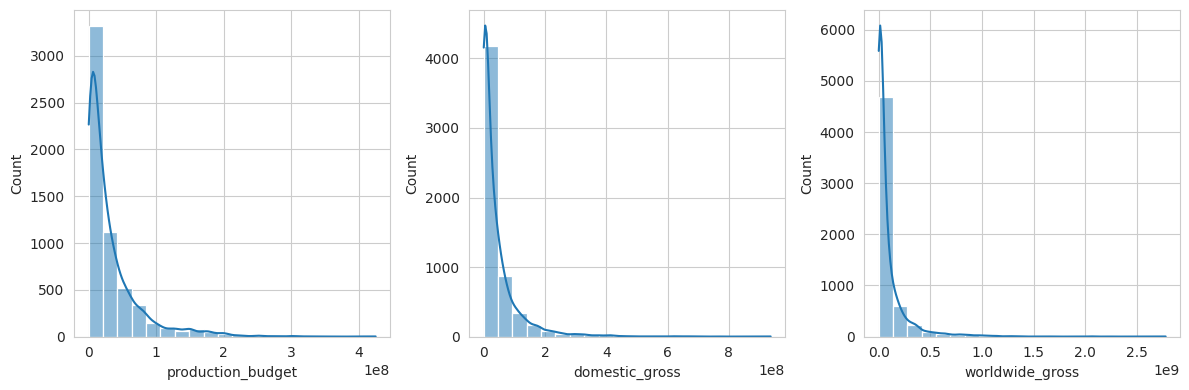

In [33]:
# Distribution plots for production_budget, domestic_gross, and worldwide_gross
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(ax=axes[0], data=movie_budgets, x='production_budget', kde=True, bins=20)
sns.histplot(ax=axes[1], data=movie_budgets, x='domestic_gross', kde=True, bins=20)
sns.histplot(ax=axes[2], data=movie_budgets, x='worldwide_gross', kde=True, bins=20)
plt.tight_layout()
plt.show()

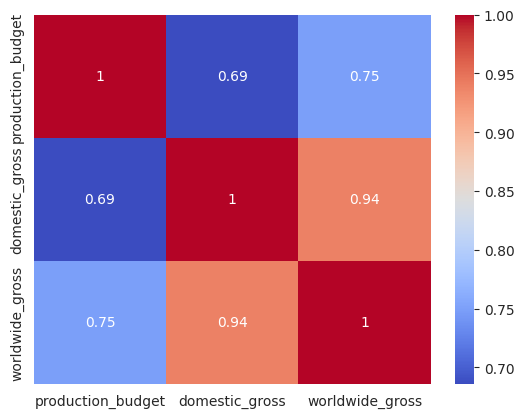

In [34]:
# Correlation matrix
corr_matrix = movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Remarks:From the correlation matrix above, we can see that there is a strong positive correlation between production_budget and both domestic_gross and worldwide_gross. This suggests that movies with higher production budgets tend to have higher box office revenues. Similarly, there is a strong positive correlation between domestic_gross and worldwide_gross, indicating that movies that perform well domestically also tend to perform well internationally.

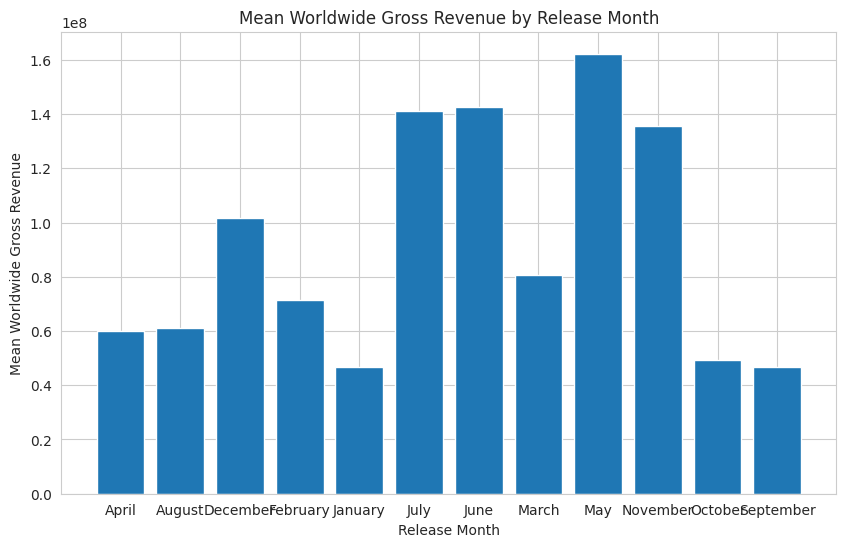

In [35]:
# Convert release_date to a datetime object
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

# Create a new column with the release month
movie_budgets['release_month'] = movie_budgets['release_date'].dt.month_name()

# Group the data by release month and calculate the mean worldwide gross revenue
month_grouped = movie_budgets.groupby('release_month')['worldwide_gross'].mean()

# Create a bar plot of the mean worldwide gross revenue by release month
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(month_grouped.index, month_grouped.values)
ax.set_xlabel('Release Month')
ax.set_ylabel('Mean Worldwide Gross Revenue')
ax.set_title('Mean Worldwide Gross Revenue by Release Month')
plt.show()

Remarks:The bar plot shows that movies released in May, June, July, and August tend to have higher worldwide gross revenue than movies released in other months. This suggests that releasing movies during the summer months can be a key factor in a movie's box office success.

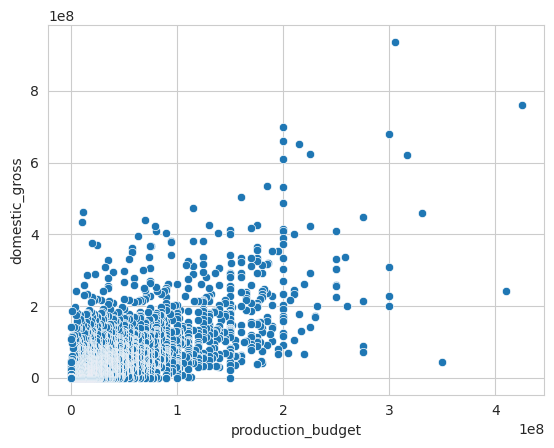

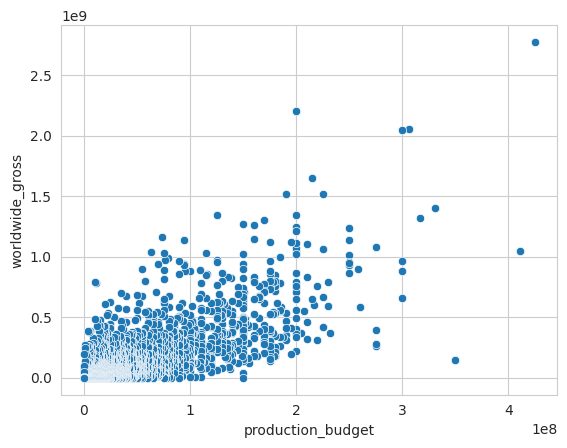

In [36]:
#Scatter plots: to check analysis of production_budget Vs domestic_gross
sns.scatterplot(x='production_budget', y='domestic_gross', data=movie_budgets)
plt.show()
#Scatter plots: to check analysis of production_budget Vs worldwide_gross
sns.scatterplot(x='production_budget', y='worldwide_gross', data=movie_budgets)
plt.show()

# **4.0 Data interpretation**

In [37]:
#Average production budget 
mean_production_budget = movie_budgets['production_budget'].mean()
print(mean_production_budget)


31587757.0965064


The mean production budget is $ 31.5 million

In [38]:
#Average domestic_gross budget 
mean_domestic_gross = movie_budgets['domestic_gross'].mean()
print(mean_domestic_gross)

41873326.867001034


The average domestic gross is $41 million

In [40]:
#Average domestic_gross budget 
mean_worldwide_gross= movie_budgets['worldwide_gross'].mean()
print(mean_worldwide_gross)


91487460.90643376


The average worldwide gross is $ 91 million ,given that the average production budget is lower than each of the domestic gross and worldwide gross we can deduce that the movies make a profit on average basis.

# **5.0 Recommendations**

1.Microsoft should consider investing in high production budgets for their films.Based on the analysis of the movie datasets, there are several key factors that contribute to a movie's box office success. The production budget is one of the most important factors, as it has a strong positive correlation with both domestic and worldwide gross earnings. 

2.Microsoft to carefully select the production companies they work with. my analysis shows that some production companies have a higher average gross earnings than others. Microsoft can consider partnering with these production companies to increase the chances of box office success

3.Release date. My analysis shows that movies released during the summer months tend to perform better than those released during other times of the year. Microsoft can leverage this insight by scheduling the release of their movies during the summer months

**5.1 Limitation**

The dataset contains data of only a short period.

# **Microsoft Movie Studio: (tmdb movies data)**

Project Overview
Microsoft is looking to create a new movie studio, but they don't have any experience in the movie industry. The goal of this project is to explore movies datasets and generate insights that can help Microsoft decide what types of films to create.

To achieve this goal, I will use exploratory data analysis on movie datasets from tn.movie_budgets.csv.gz. I will explore various factors that contribute to a movie's success, such as genre_ids,	id	original_language,	original_title,	popularity	release_date	title	vote_average	vote_count

My analysis will be guided by the following data analytic question: What are the key factors that contribute to a movie's box office success, and how can Microsoft leverage these insights to make data-driven decisions for their new movie studio?

To measure the success of our analysis, we will focus on metrics such as genre_ids	id	original_language	original_title	popularity	release_date	title	vote_average	vote_count

The final deliverable of this project will be a set of actionable insights that Microsoft can use to inform their decision-making. These insights will include recommendations for which movie production_budget, domestic_gross, worldwide_gross and release date will be most suited

Overall, this project will provide valuable insights into the current movie industry and help Microsoft make informed decisions for their new movie studio.

**1.0 Loading the data **

In [41]:
import pandas as pd

# naming the compressed CSV file

file_path="tmdb.movies.csv.gz"
# Use pandas to read the compressed CSV file
tmdb_movies= pd.read_csv(file_path, compression='gzip')

# the first 5 rows of the dataframe
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [42]:
# the last 5 rows of the dataframe
tmdb_movies.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


# **2.0 Checking the data**

In [43]:
# Determining the no. of records in our result dataset
print("tmdb_movies", tmdb_movies.shape)

tmdb_movies (26517, 10)


Remarks :the dataset has 26517 rows and 10 columns

In [44]:
# Checking the columns datatype
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Remarks the data has intergers,floats  and objects as datatypes

**2.1 Data Cleaning**

In [45]:
# Checking for missing values
print(tmdb_movies.isnull().sum())

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


no missing values

In [46]:
# Check for duplicates
print(tmdb_movies.duplicated().sum())

0


No duplicates 

# **3.0 Exploratory Data Analysis**

In [47]:
##printing the first 10 rows to get a feel of the data and  know what to perform EDA on
tmdb_movies.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [48]:
# to get descriptive analysis 
print(tmdb_movies.describe())

        Unnamed: 0             id    popularity  vote_average    vote_count
count  26517.00000   26517.000000  26517.000000  26517.000000  26517.000000
mean   13258.00000  295050.153260      3.130912      5.991281    194.224837
std     7654.94288  153661.615648      4.355229      1.852946    960.961095
min        0.00000      27.000000      0.600000      0.000000      1.000000
25%     6629.00000  157851.000000      0.600000      5.000000      2.000000
50%    13258.00000  309581.000000      1.374000      6.000000      5.000000
75%    19887.00000  419542.000000      3.694000      7.000000     28.000000
max    26516.00000  608444.000000     80.773000     10.000000  22186.000000


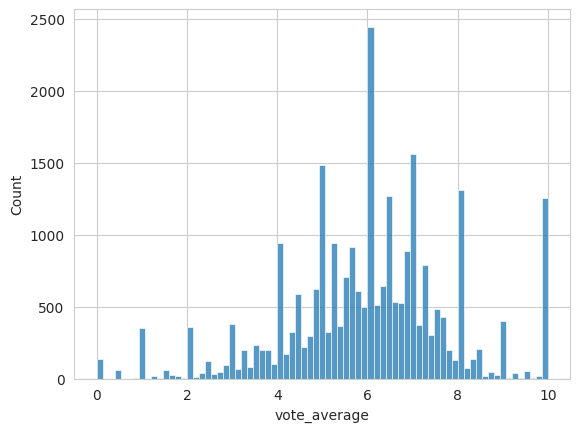

In [49]:
# Checking the distribution of the variables using histograms-vote_average
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(tmdb_movies['vote_average'])
plt.show()

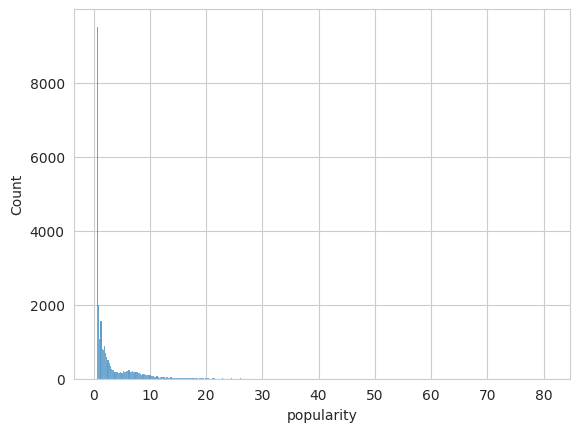

In [50]:
sns.histplot(tmdb_movies['popularity'])
plt.show()

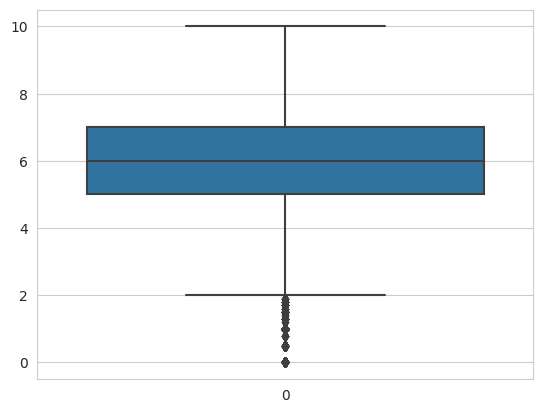

In [51]:
# Check the distribution of the variables using box plots-vote_average
sns.boxplot(tmdb_movies['vote_average'])
plt.show()

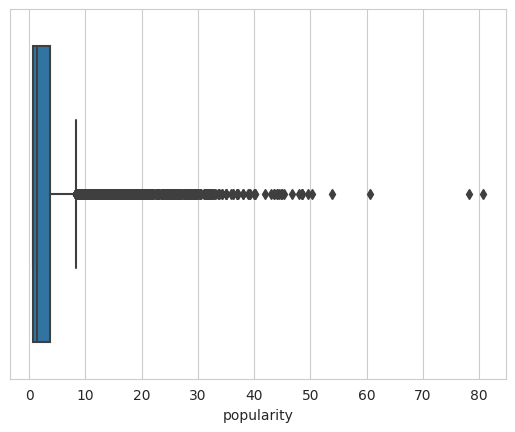

In [52]:
sns.boxplot(x=tmdb_movies['popularity'])
plt.show()

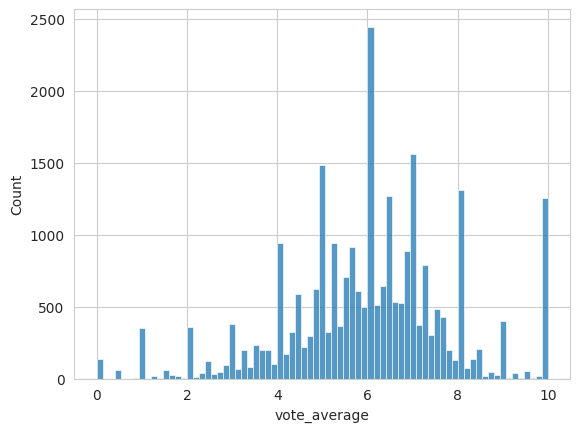

In [54]:
# Conducting univariate analysis of each variable separately
sns.histplot(tmdb_movies['vote_average'])
plt.show()

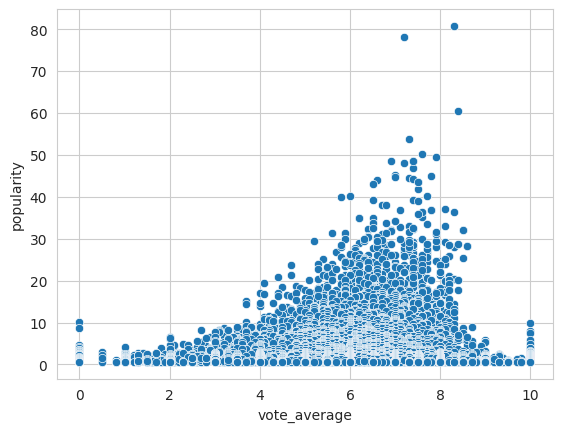

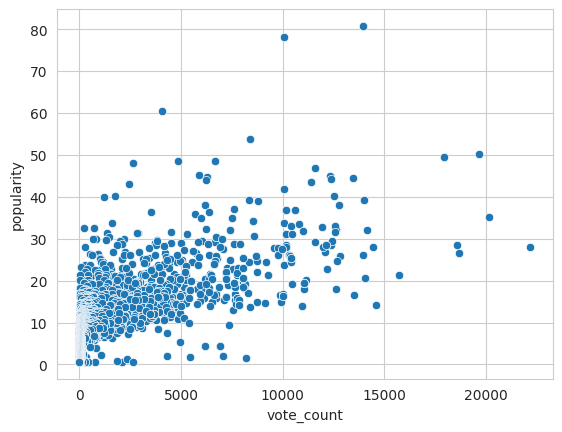

In [55]:
# Conducting  bivariate analysis to explore relationships between variables
sns.scatterplot(x=tmdb_movies['vote_average'], y=tmdb_movies['popularity'])
plt.show()

sns.scatterplot(x=tmdb_movies['vote_count'], y=tmdb_movies['popularity'])
plt.show()

Remarks:From the above , we can conclude that vote_average and popularity variables have a right-skewed distribution, and the popularity variable has some outliers. The vote_average and popularity variables also have a positive correlation, while the vote_count and popularity variables have a stronger positive correlation. This suggests that popularity and vote count might be good indicators for success in the movie industry, and Microsoft should focus on producing movies that are likely to be popular among the audience. 

# **5.0 Recommendations**

Recommendations to Microsoft :

1.Focus on producing movies that are likely to be popular among the audience, as popularity and vote count have a strong positive correlation. The popularity variable can be used as a proxy for a movie's success and can be used to prioritize the selection of movie projects.

2.Consider investing in movies that have a high vote_average, as this variable represents the average rating given by the audience, indicating how well a movie was received critically.

3.Identify the most popular genres and languages for movies, based on the genre_ids and original_language variables. Microsoft can focus on producing movies in these popular genres and languages to increase the chances of their success